![image](images/photo.jpg)

# HOUSE PRICES
# PART 2 - REGRESSION

---
### Table of contents
1. [INTRODUCTION](#1.-INTRODUCTION) <br>
1.1 [Problem description](#1.1-Problem-description) <br>
1.2 [Python libraries](#1.2-Python-libraries) <br>
1.3 [Import transformed dataset](#1.3-Import-transformed-dataset) <br>
2. [DATASET SPLITTING](#2.-DATASET-SPLITTING) <br>
3. [STANDARDIZATION](#4.-STANDARDIZATION) <br>
4. [MACHINE LEARNING MODELS](#2.-MACHINE-LEARNING-MODELS) <br>
4.1 [Ridge Regression](#4.1-Ridge-Regression) <br>
4.2 [Lasso Regression](#4.2-Lasso-Regression) <br>
4.3 [Epsilon-Support Vector Regression](#4.3-Epsilon-Support-Vector-Regression) <br>
4.4 [Decision Tree Regressor](#4.4-Decision-Tree-Regressor) <br>
4.5 [Random Forest Regressor](#4.5-Random-Forest-Regressor) <br>
4.6 [K-nearest Neighbors Regressor](#4.6-K-nearest-Neighbors-Regressor) <br>
4.7 [Multi-layer Perceptron Regressor](#4.7-Multi-layer-PerceptronRegressor) <br>
5. [MODELS EVALUATION](#5.-MODELS-EVALUATION) <br>
6. [BEST MODEL SELECTION](#6.-BEST-MODEL-SELECTION) <br>

---
# 1. INTRODUCTION
## 1.1 Problem description 
The aim of the study is to build a regression model predicting the price of a house based on its characteristics. Several ML techniques were tested for this purpose.

## 1.2 Python libraries

In [2]:
# Data analysis, processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# display settings
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:.2f}'.format

# Machine Learning
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

## 1.3 Import transformed dataset

In [3]:
df = pd.read_csv("data/kc_house_data_transformed.csv")
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,property_age,renovated_bin,view_0,view_1,view_2,view_3,view_4,price_bin
0,12.31,1.80,1.00,7.82,4.32,1.00,0,1.57,7,3.36,0.00,98178,47.51,-122.26,3.47,4.16,2014,10,59,0,1,0,0,0,0,0.00
1,13.20,1.80,2.25,8.78,4.37,2.00,0,1.57,7,3.47,69.34,98125,47.72,-122.32,3.51,4.22,2014,12,63,1,1,0,0,0,0,0.00
2,12.10,1.35,1.00,7.30,4.43,1.00,0,1.57,6,3.29,0.00,98028,47.74,-122.23,3.59,4.23,2015,2,82,0,1,0,0,0,0,0.00
3,13.31,2.18,3.00,8.44,4.29,1.00,0,2.11,7,3.34,117.87,98136,47.52,-122.39,3.47,4.14,2014,12,49,0,1,0,0,0,0,1.00
4,13.14,1.80,2.00,8.25,4.39,1.00,0,1.57,8,3.42,0.00,98074,47.62,-122.05,3.52,4.21,2015,2,28,0,1,0,0,0,0,0.00


---
# 2. DATASET SPLITTING
The data set was divided into 2 parts:
- training set (66% of observations),
- test set (33% of observations).

The process of learning and selecting parameters for individual models (using cross-validation) will be carried out on the training set. The test set will be used for the final models evaluation and selection of the best model.

In [4]:
X = df.drop(["price", "price_bin"] , axis = 1)
y = df["price"]
print("Dataframes shapes before splitting data:", X.shape, y.shape)

Dataframes shapes before splitting data: (21613, 24) (21613,)


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)
print("Train set - dataframes shapes:", X_train.shape, y_train.shape)
print("Test set - dataframes shapes:", X_test.shape, y_test.shape)

Train set - dataframes shapes: (14480, 24) (14480,)
Test set - dataframes shapes: (7133, 24) (7133,)


# 3.  STANDARDIZATION
In this step, the datasets were standardized. It's necessary for some ML models. <br>
After standardization, the mean value for each variable close to 0 and the standard deviation is close to 1.

In [6]:
# Extrac column names for future
X_colnames = X_train.columns

# Standarization on datasets
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Transform back to dataframe
X_train = pd.DataFrame(X_train, columns = X_colnames)
X_test = pd.DataFrame(X_test, columns = X_colnames)

# Mean values after standardization (train set):
print("Mean values for variables after standardization:\n{}".format(X_train.mean(axis=0)))
print('***********************************************')
# Std values after standardization (train set):
print("Std values for variables after standardization:\n{}".format(X_train.std(axis=0)))

Mean values for variables after standardization:
bedrooms         0.00
bathrooms       -0.00
sqft_living     -0.00
sqft_lot        -0.00
floors          -0.00
waterfront      -0.00
condition       -0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15   -0.00
sqft_lot15       0.00
sales_year      -0.00
sales_month     -0.00
property_age     0.00
renovated_bin   -0.00
view_0          -0.00
view_1           0.00
view_2          -0.00
view_3          -0.00
view_4          -0.00
dtype: float64
***********************************************
Std values for variables after standardization:
bedrooms        1.00
bathrooms       1.00
sqft_living     1.00
sqft_lot        1.00
floors          1.00
waterfront      1.00
condition       1.00
grade           1.00
sqft_above      1.00
sqft_basement   1.00
zipcode         1.00
lat             1.00
long            1.00
sqft_living15   1.00
sqft_lot15      1.

---
# 4. MACHINE LEARNING MODELS
The study uses 7 types of ML models for regression:

- Ridge Regression
- Lasso Regression
- Epsilon-Support Vector Regression
- Decision Tree Regressor
- Random Forest Regressor
- K-nearest Neighbors Regressor
- Milti-layer Perceptron Regressor

All models were tested on various combinations of parameters using GridSearchCV.

In [7]:
# Function for model evaluation
def evaluate_regr_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    y_pred_train = model.predict(X_train)
    print("RMSE - train set: {}".format(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))
    print("R2 - train set: {}".format(model.score(X_train, y_train)))
    print('***************************************************************************')
    y_pred_test = model.predict(X_test)
    print("RMSE - test set: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))
    print("R2 - test set: {}".format(model.score(X_test, y_test)))

## 4.1 Ridge Regression
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. <br>
Parameter tested:
- **alpha** - regularization strength. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 

In [8]:
# Ridge Regression
model1 = Ridge()
grid_param1 = {'alpha':[1000,100,30,10,1,0.5,0.3,0.1,0.01,0.001,0.0001,0.00001]}

grid_obj1 = GridSearchCV(estimator=model1, param_grid=grid_param1, cv=5, refit=True)
grid_obj1.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj1.best_params_))
print("Best score - R2:\n{}".format(grid_obj1.best_score_))
print('***************************************************************************')
print("Coefficients for the best estimator:\n{}".format(grid_obj1.best_estimator_.coef_))
print("Intercept for the best estimator:\n{}".format(grid_obj1.best_estimator_.intercept_))
print('***************************************************************************')
evaluate_regr_model(grid_obj1.best_estimator_)

Best parameters:
{'alpha': 10}
Best score - R2:
0.7714254332344233
***************************************************************************
Coefficients for the best estimator:
[-0.0261474   0.04927384  0.14468592  0.00997442  0.02689523  0.03532845
  0.03835017  0.19339185 -0.00237095  0.00162323 -0.03098258  0.18801384
 -0.00620702  0.07258838 -0.03918342  0.02575035  0.00675633  0.11204458
  0.01466832 -0.02619163  0.00790527  0.00751817  0.01565315  0.02403436]
Intercept for the best estimator:
13.045594231287554
***************************************************************************
RMSE - train set: 0.24873378962704248
R2 - train set: 0.7726338273124014
***************************************************************************
RMSE - test set: 0.2505682143337247
R2 - test set: 0.7820410614326548


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.78 <br>
    78 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.25 <br>
    Square root of the mean of the square of all of the error is 0.25.

## 4.2 Lasso Regression
The Lasso Regression is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. <br>
Parameter tested:
- **alpha** - constant that multiplies the L1 term. Alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. 

In [10]:
# Lasso Regression
model2 = Lasso()
grid_param2 = {'alpha':[1000,100,30,10,1,0.5,0.3,0.1,0.01,0.001,0.0001,0.00001]}

grid_obj2 = GridSearchCV(estimator=model2, param_grid=grid_param2, cv=5, refit=True)
grid_obj2.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj2.best_params_))
print("Best score - R2:\n{}".format(grid_obj2.best_score_))
print('***************************************************************************')
print("Coefficients for best estimator:\n{}".format(grid_obj2.best_estimator_.coef_))
print("Intercept for best estimator:\n{}".format(grid_obj2.best_estimator_.intercept_))
print('***************************************************************************')
evaluate_regr_model(grid_obj2.best_estimator_)

Best parameters:
{'alpha': 0.0001}
Best score - R2:
0.7714360617997688
***************************************************************************
Coefficients for best estimator:
[-0.02600501  0.04909535  0.14306646  0.00865954  0.02646135  0.03532553
  0.03822694  0.19353995 -0.00035986  0.00235468 -0.03076496  0.18800498
 -0.00595876  0.07234955 -0.03810816  0.02532898  0.00633619  0.11210579
  0.01455404 -0.03693785  0.0036932  -0.          0.01004976  0.0195614 ]
Intercept for best estimator:
13.045594231287554
***************************************************************************
RMSE - train set: 0.2487358381042397
R2 - train set: 0.7726300822937713
***************************************************************************
RMSE - test set: 0.250546375876387
R2 - test set: 0.7820790525207759


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.78 <br>
    78 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.25 <br>
    Square root of the mean of the square of all of the error is 0.25.

## 4.3 Epsilon-Support Vector Regression
Epsilon-Support Vector Regression. Parameters tested:
- **kernel** - kernel type to be used in the algorithm.
- **degree** - degree of the polynomial kernel function (‘poly’). Ignored by all other kernels. 
- **C** - regularization parameter. The strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty.

In [12]:
# Support Vector Regressor
model3 = SVR()
grid_param3 = {'kernel' : ('linear', 'poly', 'rbf'),
               'degree' : [3,8],
               'C' : [0.1,1,10]}

grid_obj3 = GridSearchCV(estimator=model3, param_grid=grid_param3, cv=5, refit=True)
grid_obj3.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj3.best_params_))
print("Best score - R2:\n{}".format(grid_obj3.best_score_))
print('***************************************************************************')
print("Constants in decision function for best estimator:\n{}".format(grid_obj3.best_estimator_.intercept_))
print("Number of support vectors for each class for best estimator:\n{}".format(grid_obj3.best_estimator_.n_support_))
print('***************************************************************************')
evaluate_regr_model(grid_obj3.best_estimator_)

Best parameters:
{'C': 1, 'degree': 3, 'kernel': 'rbf'}
Best score - R2:
0.8515146477096943
***************************************************************************
Constants in decision function for best estimator:
[13.40683387]
Number of support vectors for each class for best estimator:
[7434]
***************************************************************************
RMSE - train set: 0.16542153568386914
R2 - train set: 0.8994365013104819
***************************************************************************
RMSE - test set: 0.20088504577494337
R2 - test set: 0.8599065131036251


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.86 <br>
    86 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.20 <br>
    Square root of the mean of the square of all of the error is 0.20.

## 4.4 Decision Tree Regressor
Decision Tree Regressor. Parameters tested:
- **criterion** - the function to measure the quality of a split. <br> Tested types: “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.
- **max_depth** - the maximum depth of the tree.
- **max_leaf_nodes** - grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

In [15]:
# Decision Tree Regressor
model4 = DecisionTreeRegressor()
grid_param4 = {"criterion": ["mse", "mae"],
               "max_depth": [5, 10, 15],
               "max_leaf_nodes": [10, 30, 60, 100]}

grid_obj4 = GridSearchCV(estimator=model4, param_grid=grid_param4, cv=5, refit=True)
grid_obj4.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj4.best_params_))
print("Best score - R2:\n{}".format(grid_obj4.best_score_))
print('***************************************************************************')
evaluate_regr_model(grid_obj4.best_estimator_)

Best parameters:
{'criterion': 'mse', 'max_depth': 15, 'max_leaf_nodes': 100}
Best score - R2:
0.803493080692039
***************************************************************************
RMSE - train set: 0.20934508386268172
R2 - train set: 0.8389421819467362
***************************************************************************
RMSE - test set: 0.2258121167023007
R2 - test set: 0.8229820888298947


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.82 <br>
    82 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.23 <br>
    Square root of the mean of the square of all of the error is 0.23.

#### Tree visualization

/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


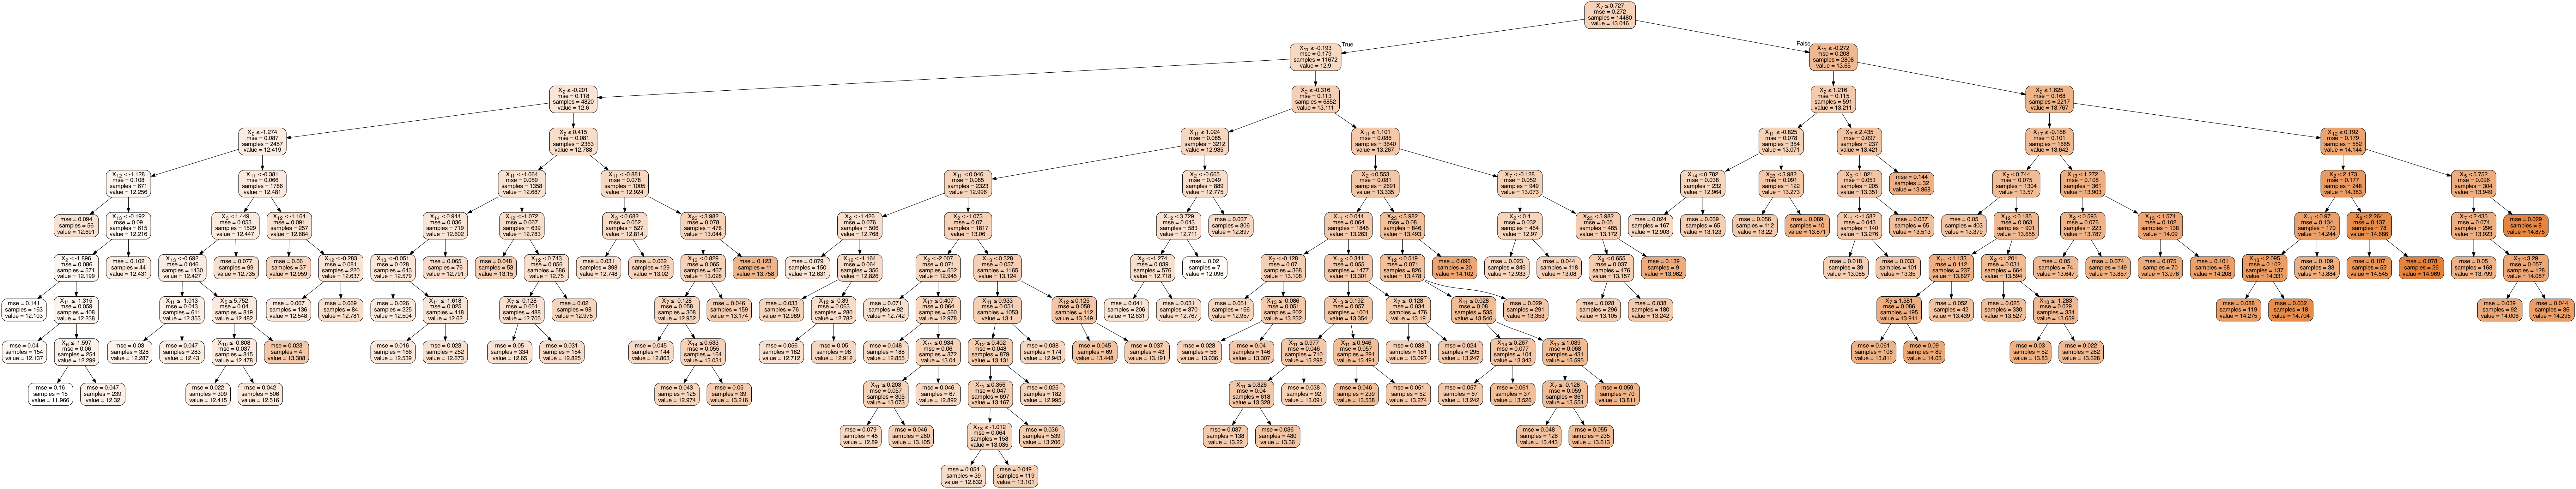

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(grid_obj4.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Feature importance
The importance of a feature for Decision Tree Regressor is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. <br>
The most important features in the model are: **"grade", "lat", sqft_living"** - together **0.92** of normalized total  reduction of criteria by features.

In [17]:
# Function for feature importance graph
def plot_feature_importances(model, data):
    feature_names = data.columns.values  
    df_featimport = pd.DataFrame([i for i in zip(feature_names, model.feature_importances_)],   
                                 columns=["features","importance"])
    plot = sns.barplot(x="importance", y="features",   
                       data=df_featimport.sort_values('importance', ascending=False))  
    plot.set(xlabel='Feature Importance')  
    plot.set(ylabel='Feature')

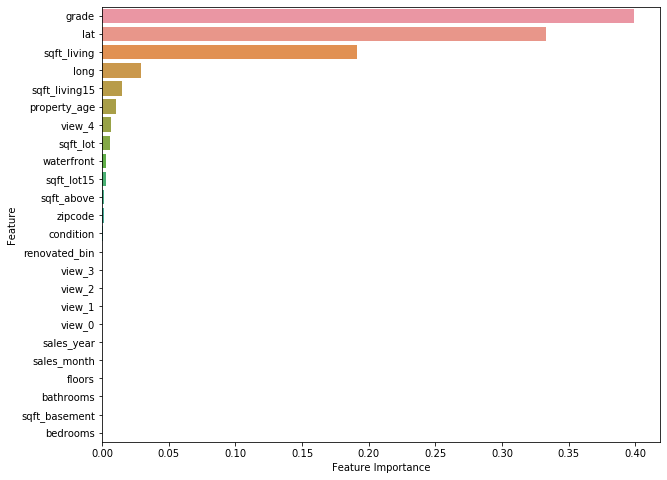

In [18]:
# Decision Tree Regressor - feature importance
plt.figure(figsize=(10, 8))
plot_feature_importances(grid_obj4.best_estimator_, X_train) 

## 4.5 Random Forest Regressor
A Random Forest Regressor built on 50 trees in the forest. Parameters tested:
- **criterion** - the function to measure the quality of a split. Tested criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.
- **max_depth** - the maximum depth of the tree.
- **max_leaf_nodes** - grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.
- **max_features** - the number of features to consider when looking for the best split.

In [20]:
# Random Forest Regressor
model5 = RandomForestRegressor(n_estimators=50)
grid_param5 = {"criterion": ["mse", "mae"],
               "max_depth" : [5, 10, 15],
               "max_leaf_nodes" : [10, 50, 100],
               "max_features" : ["auto", "sqrt", "log2"]}

grid_obj5 = GridSearchCV(estimator = model5, param_grid = grid_param5, cv=5, refit=True)
grid_obj5.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj5.best_params_))
print("Best score - R2:\n{}".format(grid_obj5.best_score_))
print('***************************************************************************')
evaluate_regr_model(grid_obj5.best_estimator_)

Best parameters:
{'criterion': 'mse', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': 100}
Best score - R2:
0.8479056361335522
***************************************************************************
RMSE - train set: 0.1880473529897503
R2 - train set: 0.8700456782384698
***************************************************************************
RMSE - test set: 0.20165760621608547
R2 - test set: 0.8588269026077283


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.86 <br>
    86 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.20 <br>
    Square root of the mean of the square of all of the error is 0.20

#### Feature importance
The importance of a feature for Random Forest Regressor is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. <br>
The most important features in the model are: **"grade", "lat", sqft_living"** - together **0.87** of normalized total  reduction of criteria by features.

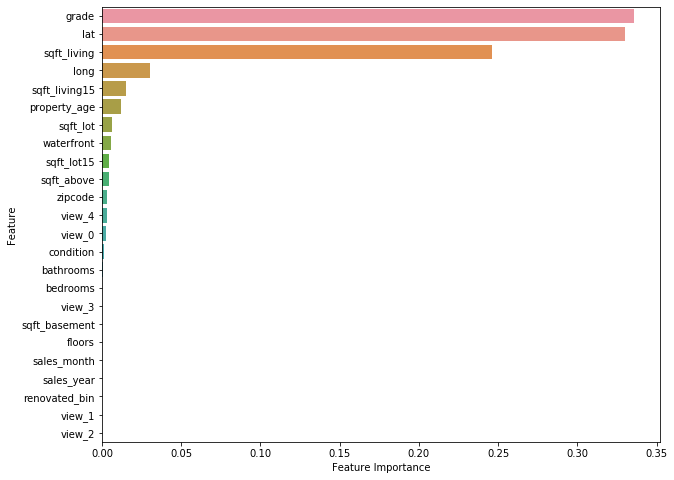

In [21]:
# Random Forest Regressor - feature importance
plt.figure(figsize=(10, 8))
plot_feature_importances(grid_obj5.best_estimator_, X_train)

## 4.6 K-nearest Neighbors Regressor
Regression based on k-nearest neighbors. Parameters tested:
- **n_neighbors** - number of neighbors to use by default for kneighbors queries.
- **weights** - weight function used in prediction.

In [22]:
# KNeighbors Regressor
model6 = KNeighborsRegressor()
grid_param6 = {'n_neighbors': list(range(1,10)), 
               'weights': ['uniform', 'distance']}
grid_obj6 = GridSearchCV(estimator = model6, param_grid = grid_param6, cv=5, refit=True,
                         scoring = "neg_median_absolute_error")
grid_obj6.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj6.best_params_))
print("Best score - R2:\n{}".format(grid_obj6.best_score_))
print('***************************************************************************')
evaluate_regr_model(grid_obj6.best_estimator_)

Best parameters:
{'n_neighbors': 9, 'weights': 'distance'}
Best score - R2:
-0.11819763876916678
***************************************************************************
RMSE - train set: 3.2604936441212336e-05
R2 - train set: 0.9999999960931837
***************************************************************************
RMSE - test set: 0.22967352090897522
R2 - test set: 0.8168762873338854


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.82 <br>
    82 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.23 <br>
    Square root of the mean of the square of all of the error is 0.23

## 4.7 Milti-layer Perceptron Regressor
Multi-layer Perceptron Regressor. Model optimizes the squared-loss using LBFGS or stochastic gradient descent. Parameters tested:
- **hidden_layer_size** - the ith element represents the number of neurons in the ith hidden layer.
- **activation** - activation function for the hidden layer.

In [23]:
# MLP Regressor
model7 = MLPRegressor()
grid_param7 = {"hidden_layer_sizes": [(1,),(50,),(100,)], 
               "activation": ["identity", "logistic", "tanh", "relu"]}

grid_obj7 = GridSearchCV(estimator = model7, param_grid = grid_param7, cv=5, refit=True)
grid_obj7.fit(X_train, y_train)

# Results
print("Best parameters:\n{}".format(grid_obj7.best_params_))
print("Best score - R2:\n{}".format(grid_obj7.best_score_))
print('***************************************************************************')
evaluate_regr_model(grid_obj7.best_estimator_)

/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/kingamianowana/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

Best parameters:
{'activation': 'tanh', 'hidden_layer_sizes': (100,)}
Best score - R2:
0.8669199196819705
***************************************************************************
RMSE - train set: 0.18103439041910865
R2 - train set: 0.8795578648617441
***************************************************************************
RMSE - test set: 0.20326461674147048
R2 - test set: 0.8565679190914399


#### Model evaluation  - results for test set:
- **R-Squared** (Coefficient of Determination): 0.86 <br>
    86 % of variance in "price" variable can be explained by our model.
- **RMSE** (Root Mean Squared Error): 0.20 <br>
    Square root of the mean of the square of all of the error is 0.20

---
# 5. MODELS EVALUATION
In order to compare the models with each other and select the best one, a table was constructed containing the following measures:
- **MSE** (Mean Squared Error) - measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated.
- **RMSE** (Root Mean Squared Error) - square root of the mean of the square of all of the error. 
- **MAE** (Mean Absolute Error) - measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
- **R-Squared** (Coefficient of Determination) - value between 0 and 1 that measures how well our regression line fits our data. R-Squared can be interpreted as the percent of variance in our dependent variable that can be explained by our model. 

These measures were calculated for each model, both for the training set and the test set. The final model selection was based on the best results of the test set.

In [25]:
# Create list of models
models = []
models.append(('Ridge regression', grid_obj1.best_estimator_))
models.append(('Lasso Regression', grid_obj2.best_estimator_))
models.append(('Epsilon-Support Vector Regression', grid_obj3.best_estimator_))
models.append(('Decision Tree Regressor', grid_obj4.best_estimator_))
models.append(('Random Forest Regressor', grid_obj5.best_estimator_))
models.append(('K-nearest Neighbors Regressor', grid_obj6.best_estimator_))
models.append(('Multi-layer Perceptron regressor', grid_obj7.best_estimator_))

# Create empty lists for measures 
method = []
mse_train = []
rmse_train = []
mae_train = []
r2_train = []
mse_test = []
rmse_test = []
mae_test = []
r2_test = []

# Calculate measures
for name, model in models: 
    # method:
    method.append(name)
    # train set:
    y_pred_train = model.predict(X_train)
    mse_train.append(metrics.mean_squared_error(y_train, y_pred_train))
    rmse_train.append(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    mae_train.append(metrics.mean_absolute_error(y_train, y_pred_train))
    r2_train.append(model.score(X_train, y_train))
    # test set:
    y_pred_test = model.predict(X_test)
    mse_test.append(metrics.mean_squared_error(y_test, y_pred_test))
    rmse_test.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    mae_test.append(metrics.median_absolute_error(y_test, y_pred_test))
    r2_test.append(model.score(X_test, y_test))
    
# Create table with matrices
d = {'Method' : method,
     'MSE (train)': mse_train,
     'RMSE (train)': rmse_train,
     'MAE (train)': mae_train,
     'R2 (train)': r2_train,
     'MSE (test)': mse_test,
     'RMSE (test)': rmse_test,
     'MAE (test)': mae_test,
     'R2 (test)': r2_test
    }
df_measures = pd.DataFrame(data=d)
df_measures

,Method,MSE (train),RMSE (train),MAE (train),R2 (train),MSE (test),RMSE (test),MAE (test),R2 (test)
0,Ridge regression,0.06,0.25,0.19,0.77,0.06,0.25,0.15,0.78
1,Lasso Regression,0.06,0.25,0.19,0.77,0.06,0.25,0.15,0.78
2,Epsilon-Support Vector Regression,0.03,0.17,0.12,0.90,0.04,0.20,0.10,0.86
3,Decision Tree Regressor,0.04,0.21,0.16,0.84,0.05,0.23,0.13,0.82
4,Random Forest Regressor,0.04,0.19,0.14,0.87,0.04,0.20,0.11,0.86
5,K-nearest Neighbors Regressor,0.00,0.00,0.00,1.00,0.05,0.23,0.12,0.82
6,Multi-layer Perceptron regressor,0.03,0.18,0.14,0.88,0.04,0.20,0.11,0.86


# 6. BEST MODEL SELECTION

Among all tested techniques, **Multi-layer Perceptron regressor** is the most effective. All investigated measures work best with this technique. <br> 
Comparing to the training set, the results are slightly worse on the test set. It's a natural situation. The difference is insignificant, which means that the model is **not overfitted**.

Measures for the Multi-layer Perceptron regressor model with interpretation (for test set):
- **R-Squared** (Coefficient of Determination): 0.86 <br>
    86 % of variance in "price" variable can be explained by our model.
- **MSE** (Mean Squared Error): 0.04 <br>
    Average squared difference between the estimated price values (after transformations) and what is estimated is 0.04.
- **RMSE** (Root Mean Squared Error): 0.20 <br>
    Square root of the mean of the square of all of the error is 0.20.
- **MAE** (Mean Absolute Error): 0.11 <br>
    Average magnitude of the errors when predicting "price" variable (after transformations), without considering their direction is 0.11.

*******************************************************************************************************************************